In [8]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
# import cv2

In [10]:
# I = io.imread("land.jpeg")
I = io.imread("Forest.jpeg")
print(I.shape)

(550, 825)


C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\1371413534.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(np.float64(-0.5), np.float64(824.5), np.float64(549.5), np.float64(-0.5))

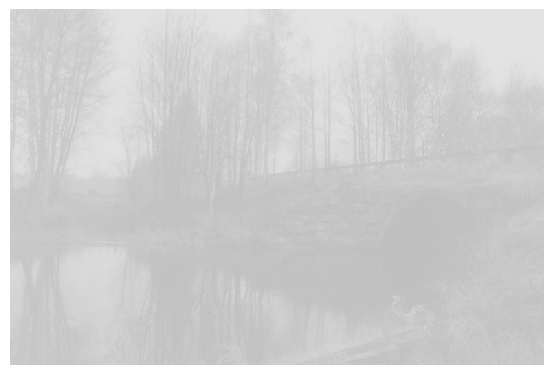

In [11]:
io.imshow(I)
plt.axis("off")

# Plotting Histogram

In [13]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

In [14]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


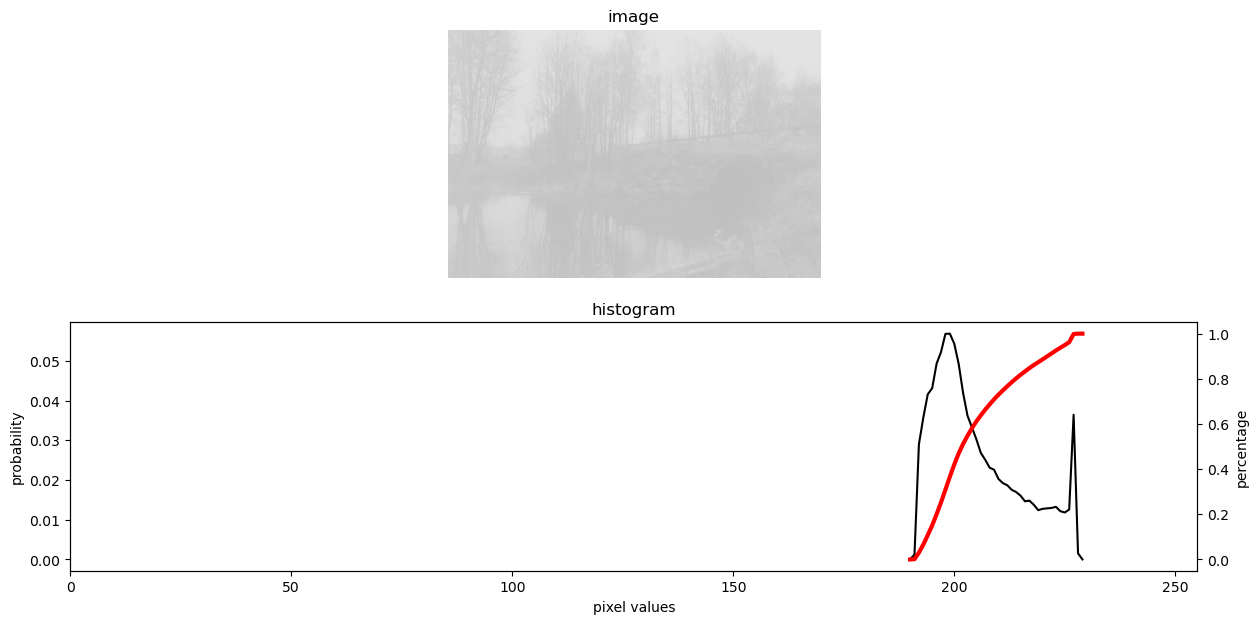

In [15]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I, normalize=True)
plt.show()

## Histogram of Color Image

In [16]:
I = io.imread("Desk.jpg")
print(I.shape)

(550, 550, 3)


C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\1371413534.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(np.float64(-0.5), np.float64(549.5), np.float64(549.5), np.float64(-0.5))

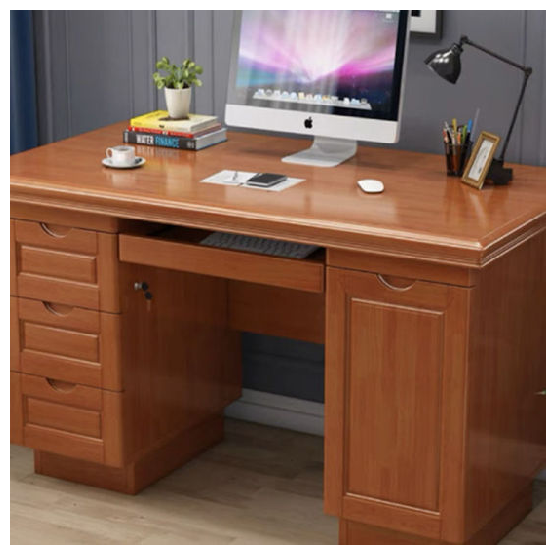

In [17]:
io.imshow(I)
plt.axis("off")

In [18]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

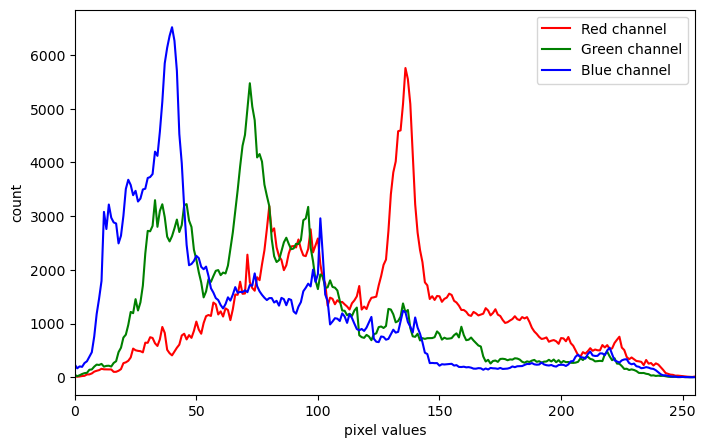

In [19]:
plot_hist_color(I)
plt.show()

Text(0.5, 1.0, 'Blue')

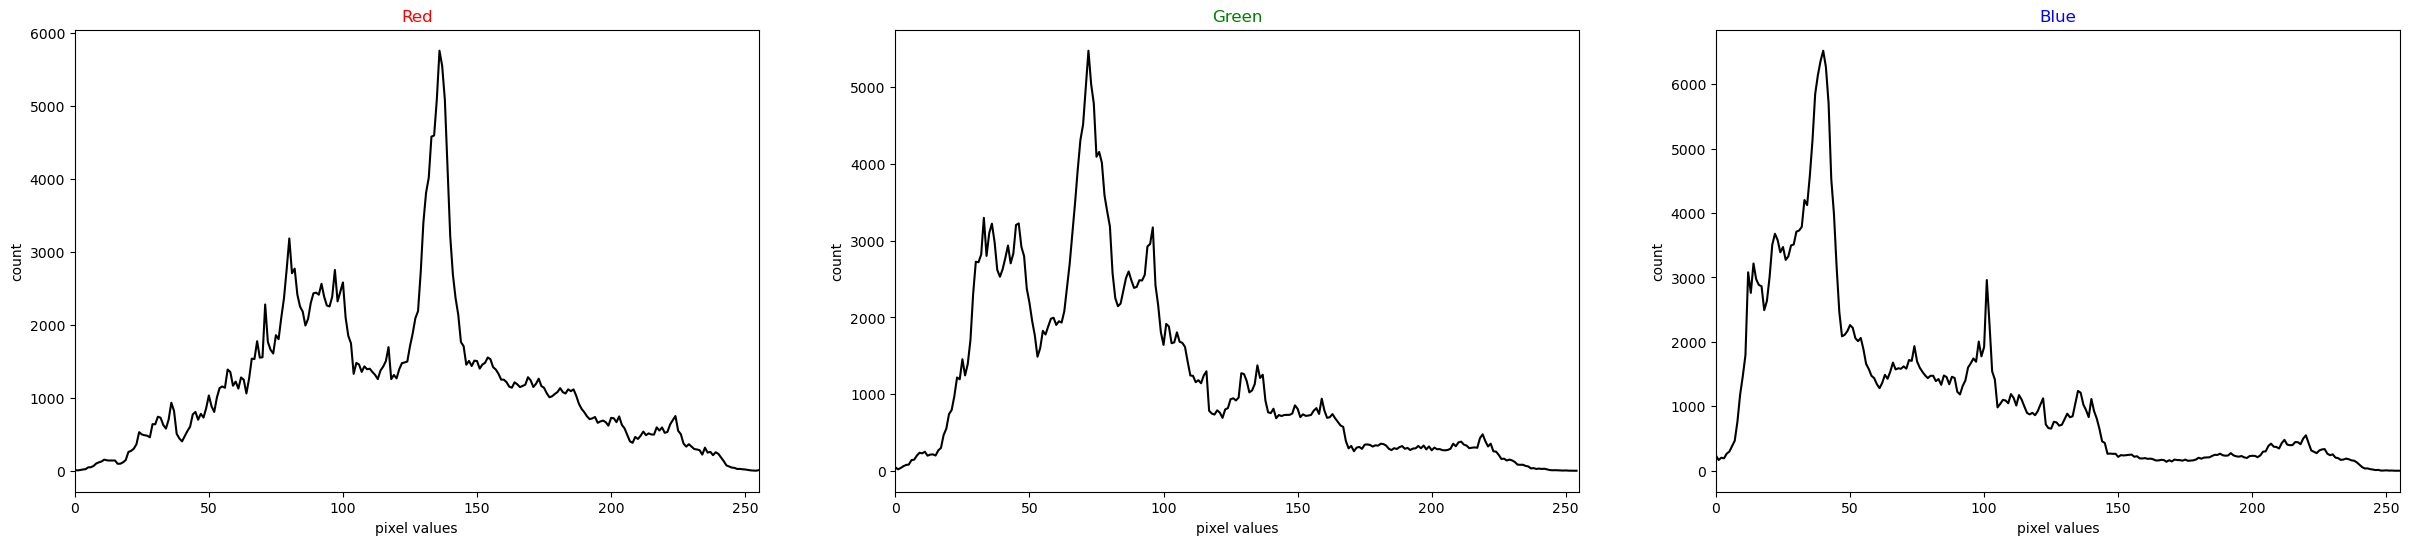

In [20]:
plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=False)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=False)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=False)
plt.title("Blue", color="blue")

# Histogram Equalization

In [21]:
I = io.imread("Forest.jpeg")
I = I/255
print(I.shape)

(550, 825)


In [22]:
Ieq = exposure.equalize_hist(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


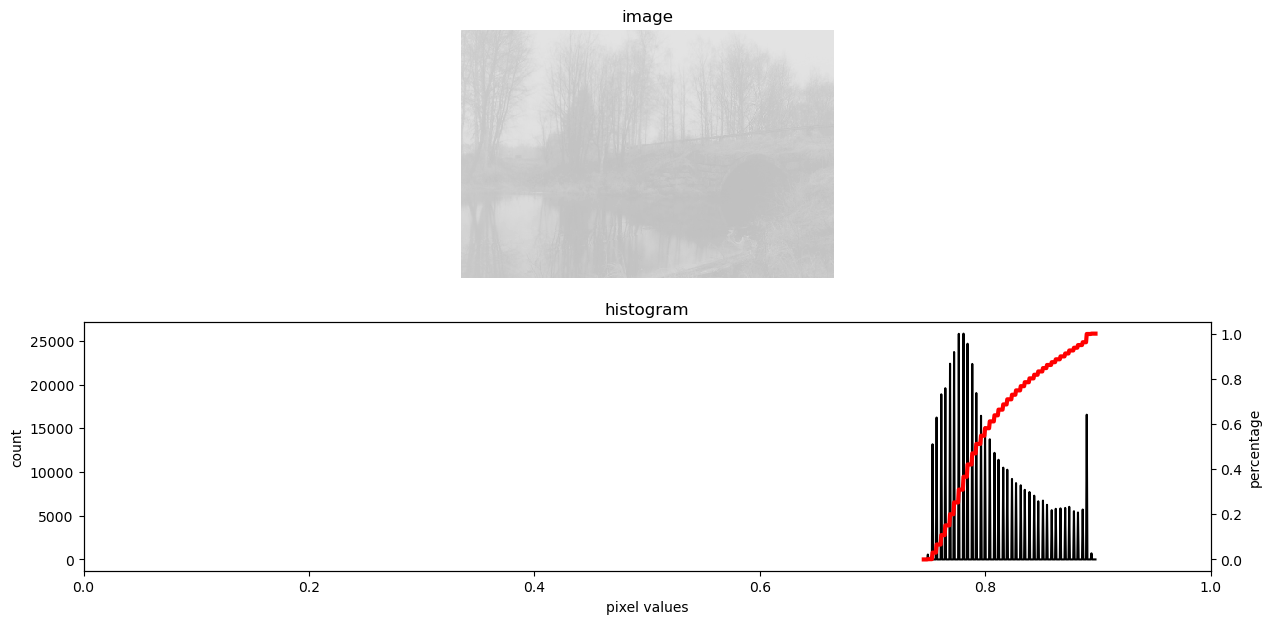

In [23]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


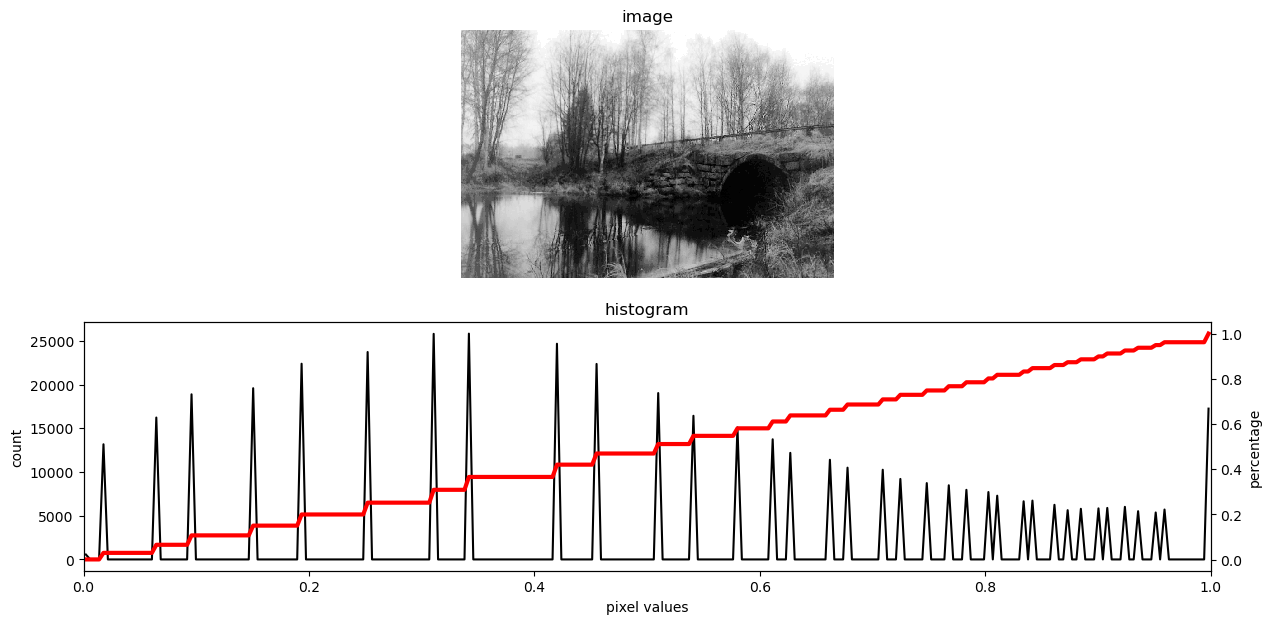

In [24]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


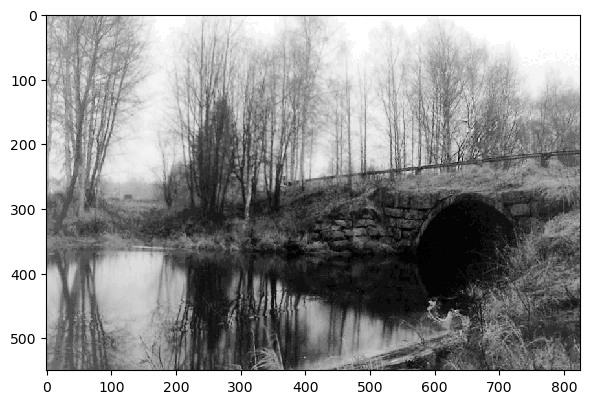

In [25]:
io.imshow(Ieq)

In [27]:
I = io.imread("Tsukuba.jpeg")
I = I/255

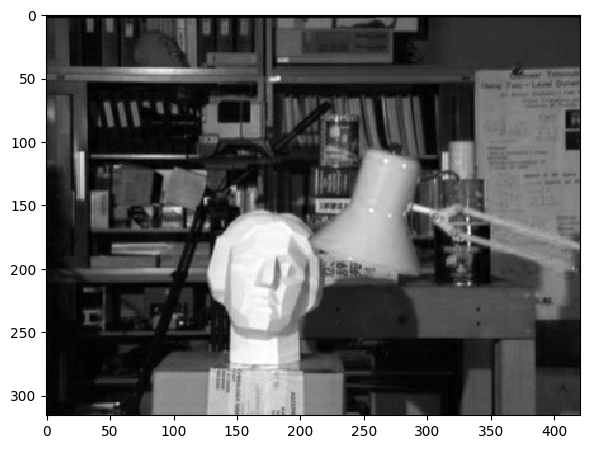

In [ ]:
io.imshow(I)

In [28]:
# cv2.imwrite("Tsukuba.jpeg", (I11*255).astype(int))

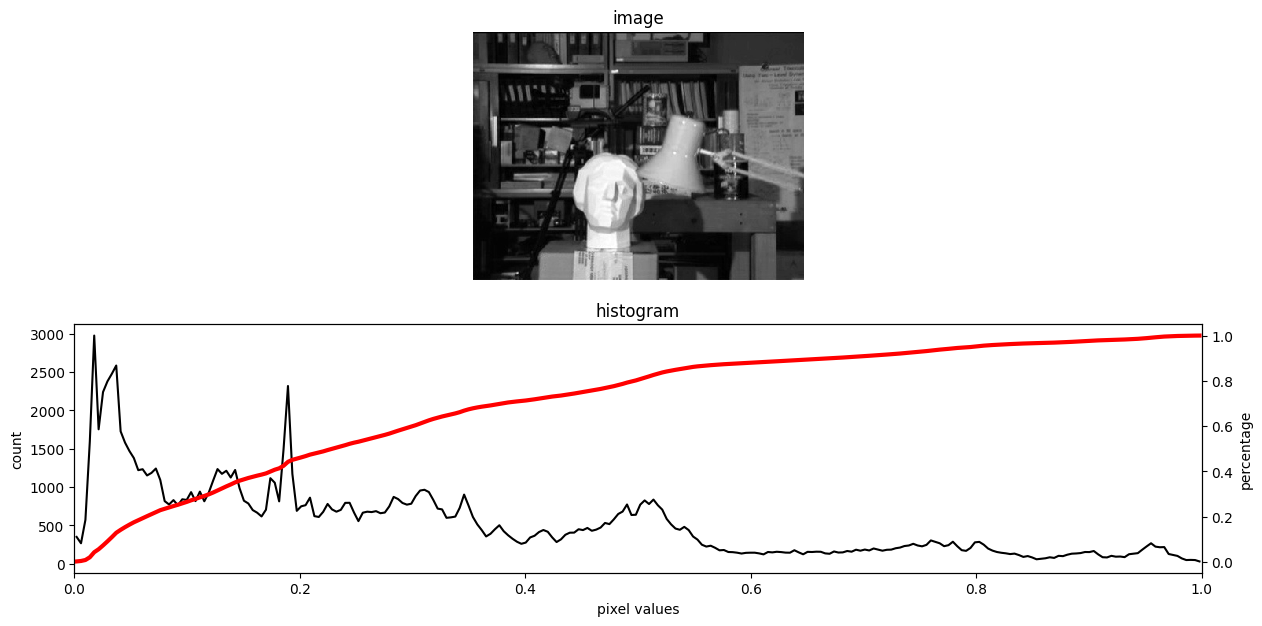

In [ ]:
plot_img_and_hist(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


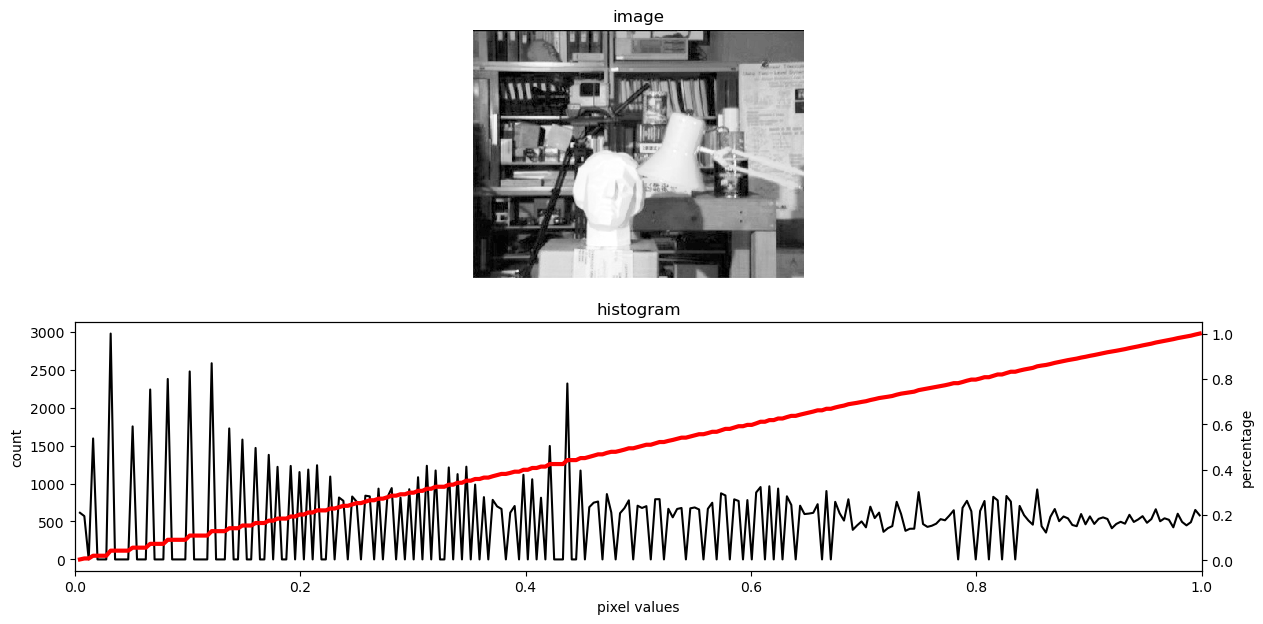

In [29]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


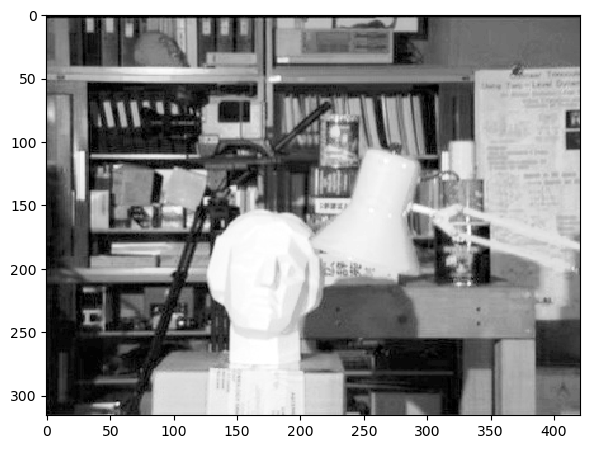

In [30]:
io.imshow(Ieq)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


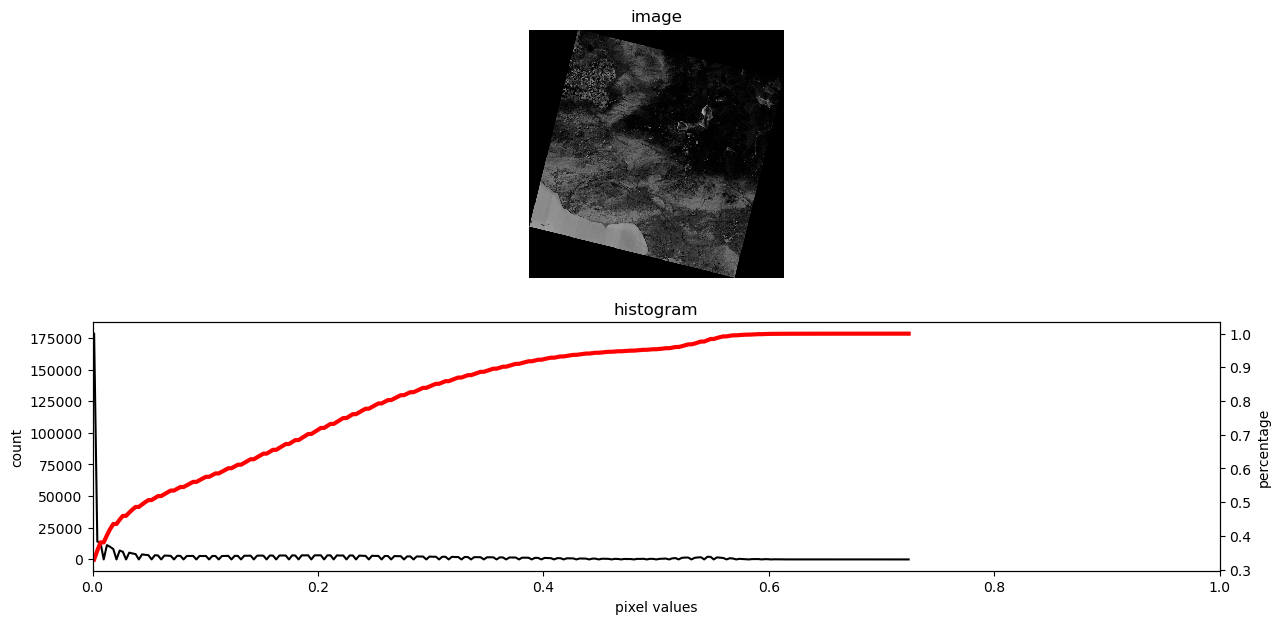

In [32]:
I = io.imread("LandSat2.jpg")
I = I/255
plot_img_and_hist(I, plot_cdf=True)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


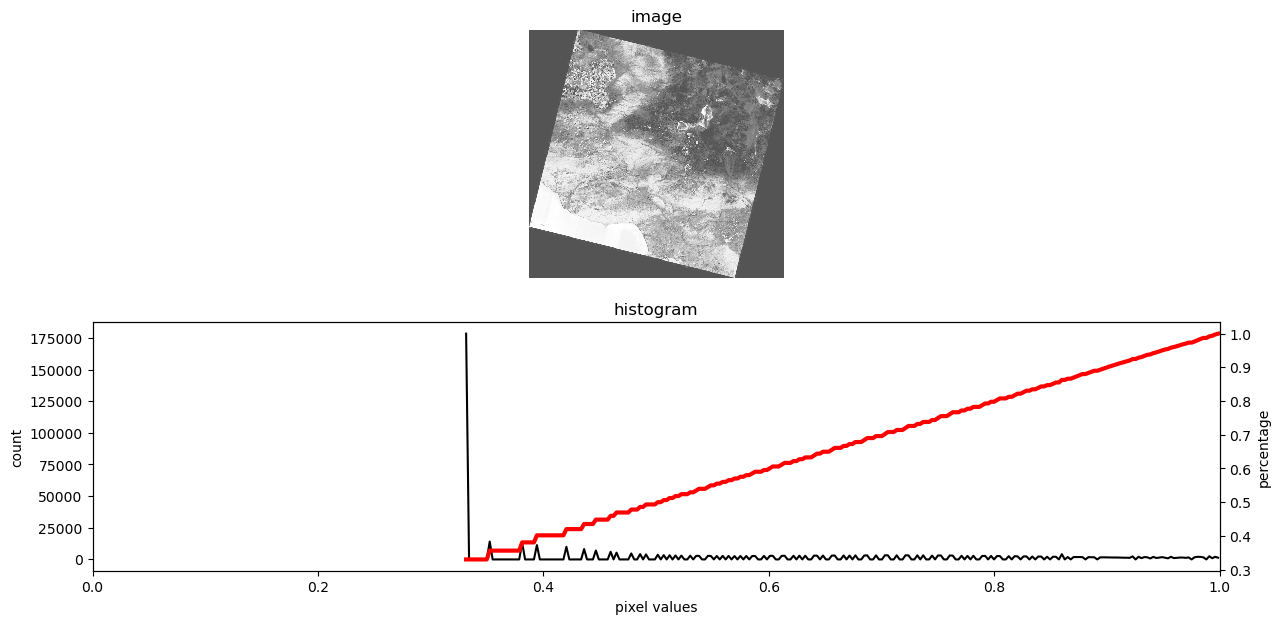

In [33]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


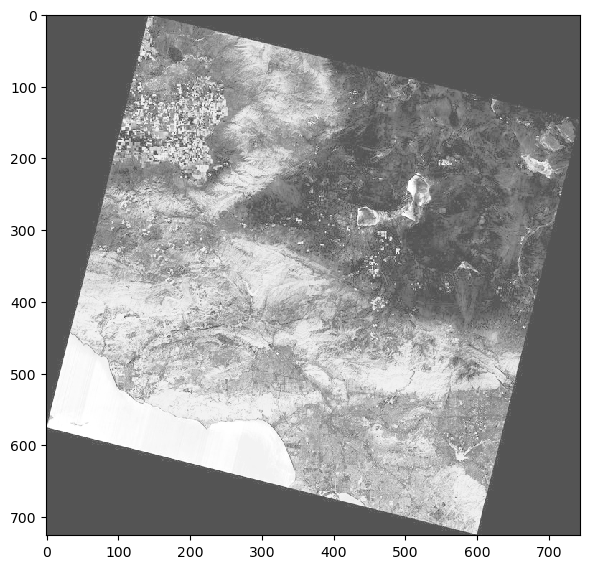

In [34]:
io.imshow(Ieq)

In [35]:
I = io.imread("Desk.jpg")
I = I/255

In [36]:
Ieq = I.copy()
Ieq[:, :, 0] = exposure.equalize_hist(I[:, :, 0])
Ieq[:, :, 1] = exposure.equalize_hist(I[:, :, 1])
Ieq[:, :, 2] = exposure.equalize_hist(I[:, :, 2])

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\2226826253.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


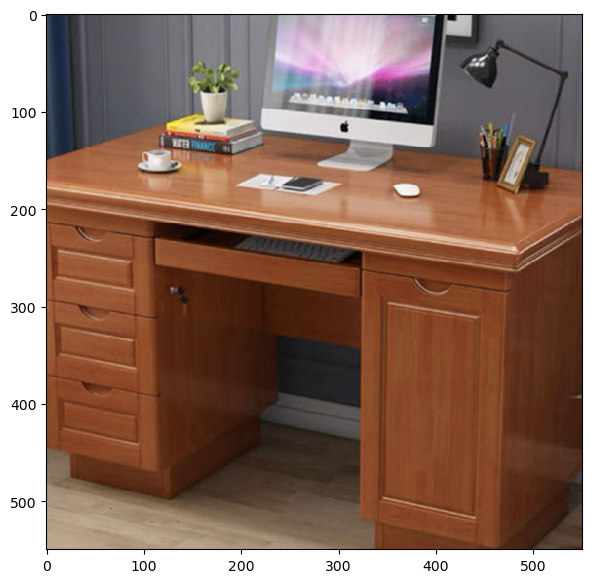

In [37]:
io.imshow(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


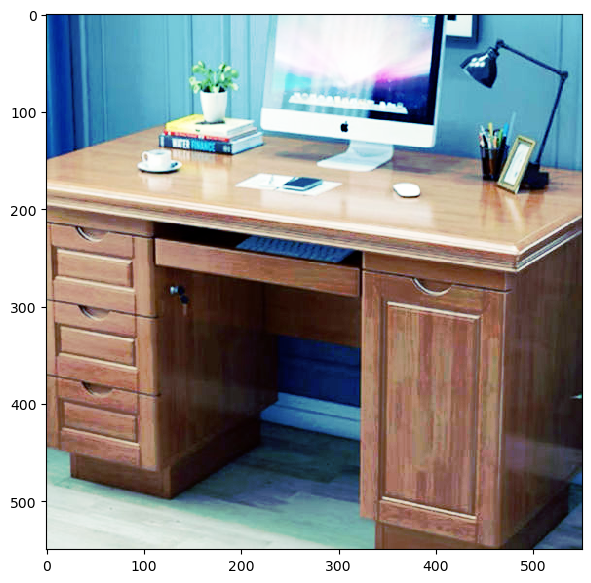

In [38]:
io.imshow(Ieq)

In [40]:
Ilab = color.rgb2lab(I)

In [41]:
print(I.shape)
print(Ilab.shape)

(550, 550, 3)
(550, 550, 3)


In [42]:
print(Ilab[:, :, 0].min())
print(Ilab[:, :, 0].max())

0.039573654069084085
99.75342383162682


C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\389682819.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ilab[:, :, 0]/100)


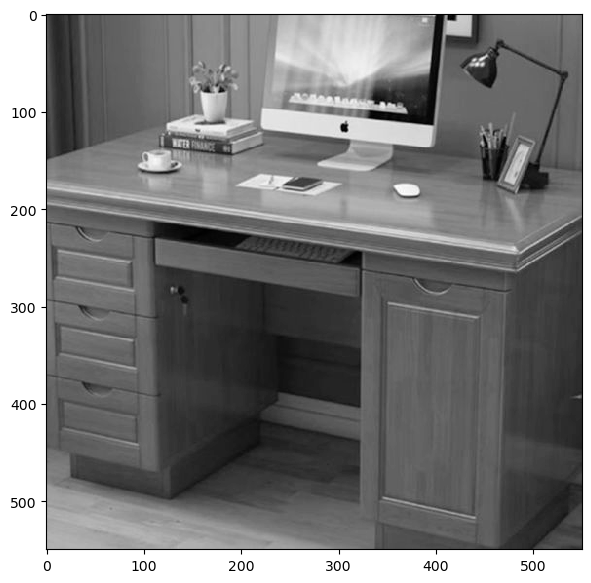

In [43]:
io.imshow(Ilab[:, :, 0]/100)
# io.imshow(Ilab[:, :, 2])

In [44]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

In [45]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


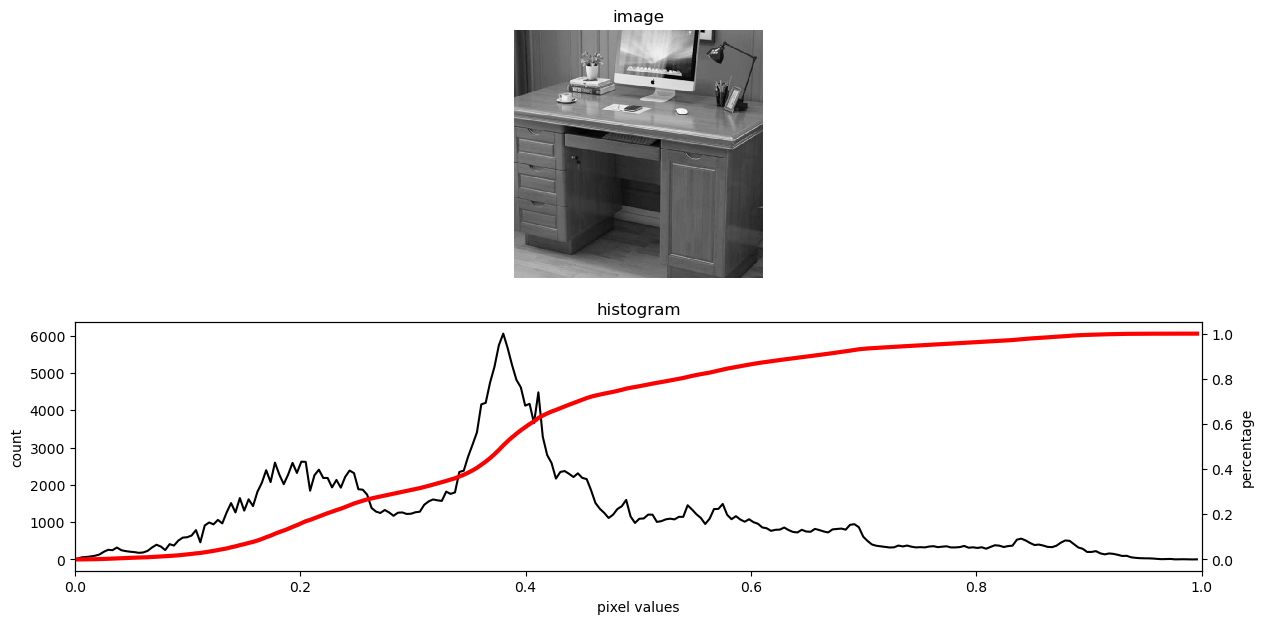

In [46]:
plot_img_and_hist(Ilab[:, :, 0])

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


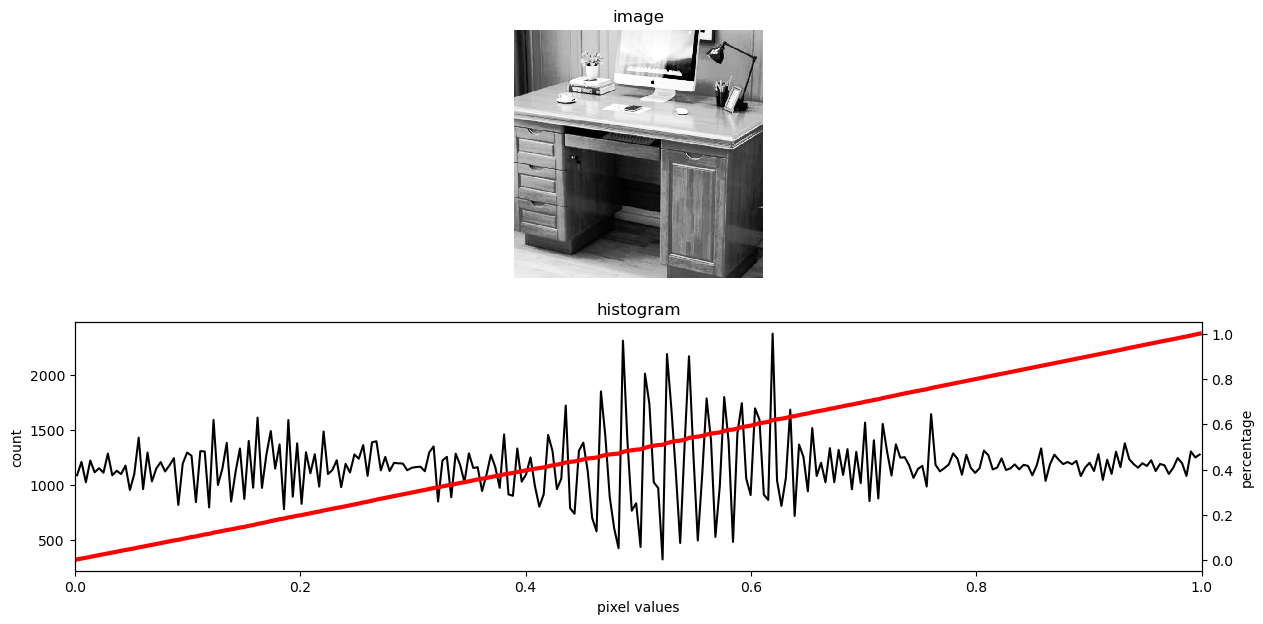

In [47]:
plot_img_and_hist(Ieq)

# Degrading Image

In [48]:
I = io.imread("Tsukuba.jpeg")
I = I/255

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


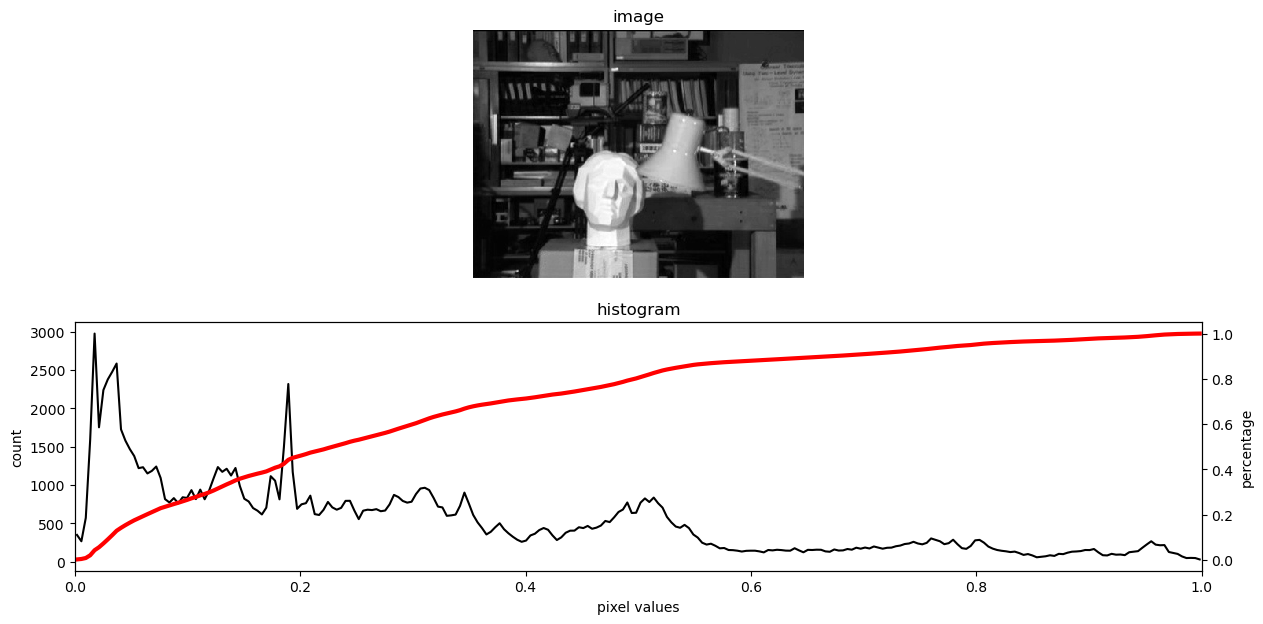

In [49]:
plot_img_and_hist(I)

In [50]:
Idegraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.6, 0.8))

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


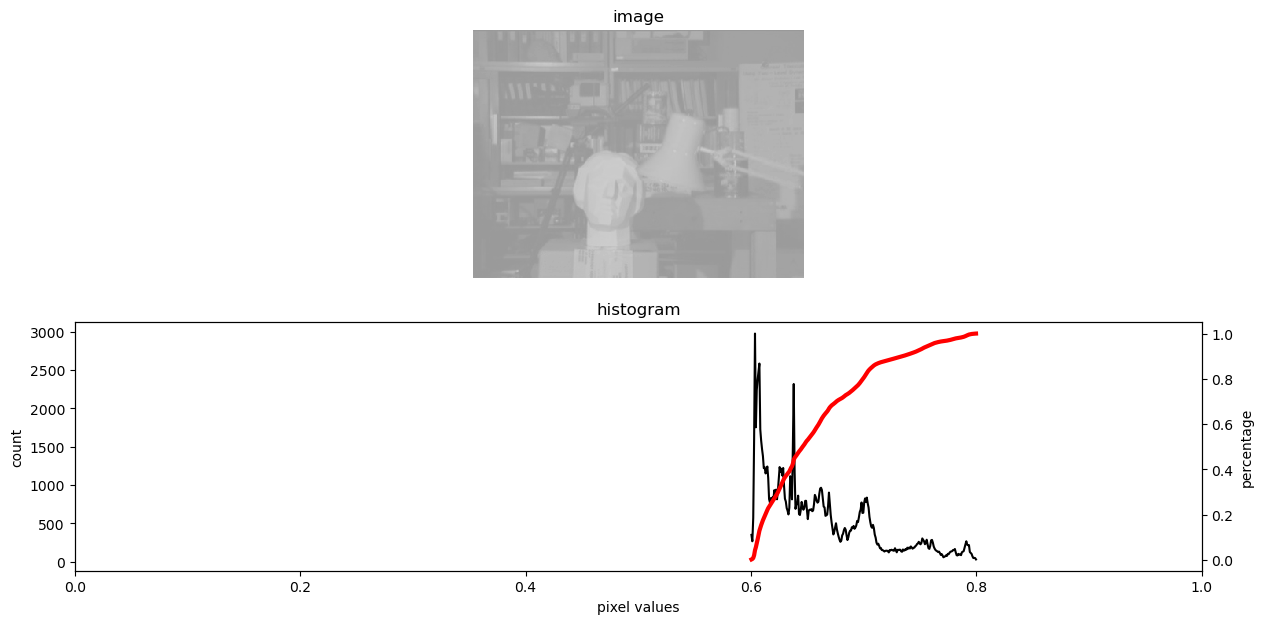

In [51]:
plot_img_and_hist(Idegraded)

In [52]:
Ieq_degraded = exposure.equalize_hist(Idegraded)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


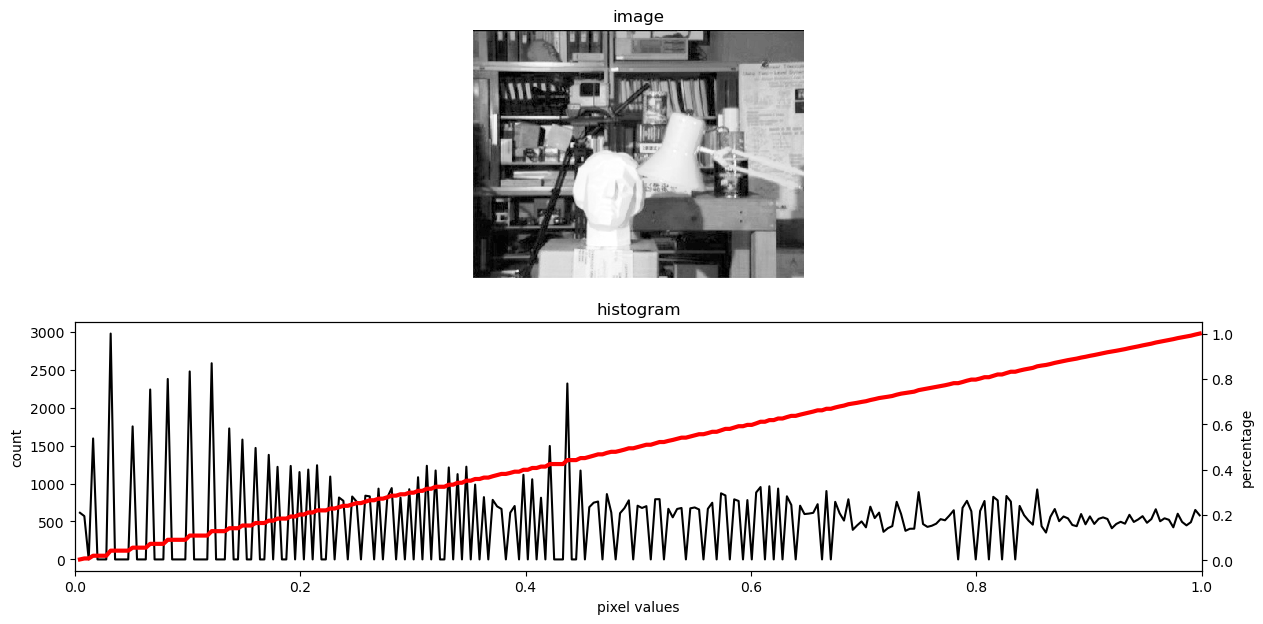

In [53]:
plot_img_and_hist(Ieq_degraded)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


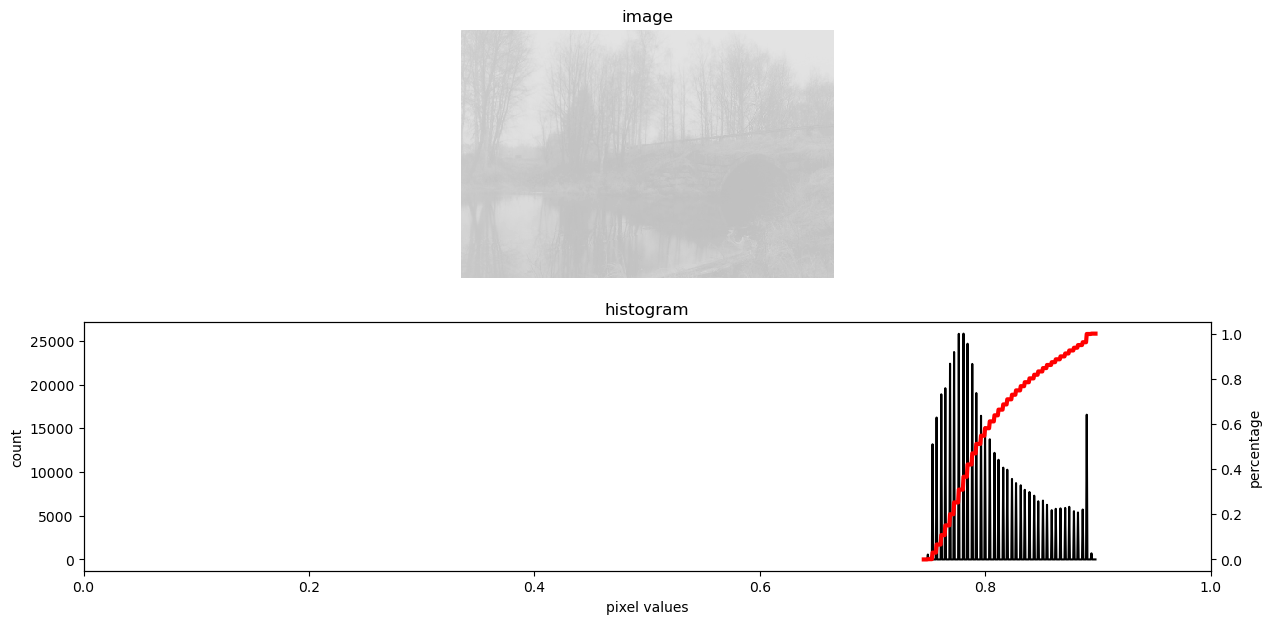

In [54]:
I = io.imread("Forest.jpeg")
I = I/255
plot_img_and_hist(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


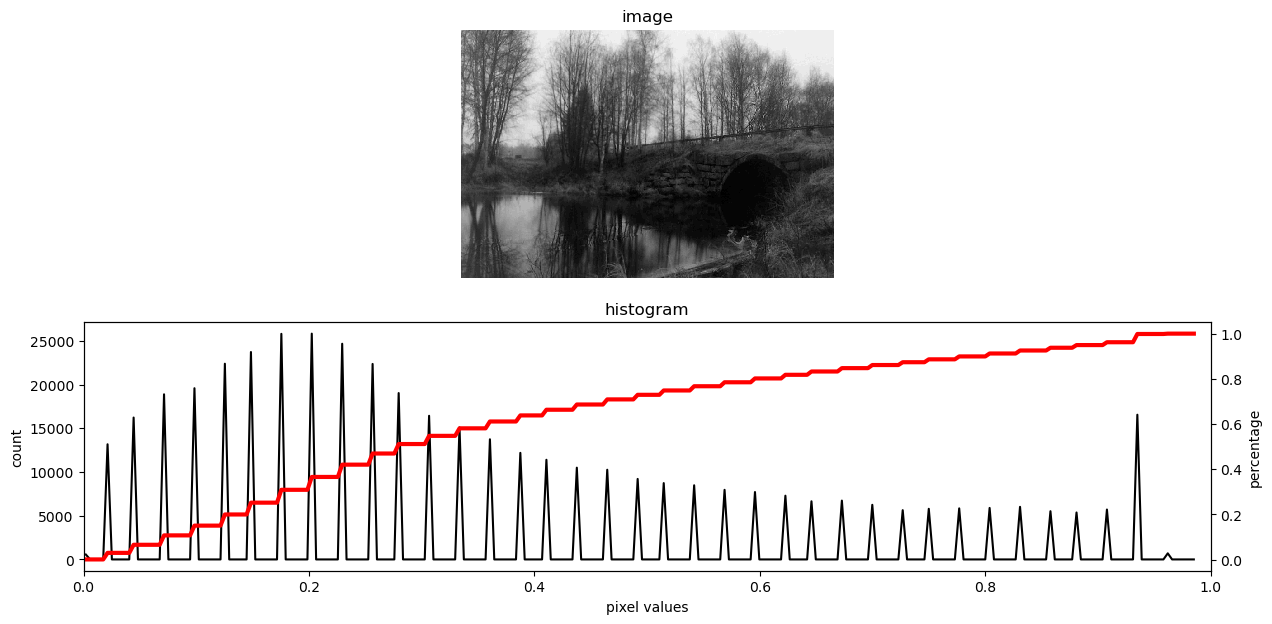

In [55]:
Idegraded = exposure.rescale_intensity(I, in_range=(0.75, 0.9), out_range=(0, 1))
plot_img_and_hist(Idegraded)

## Degrading color image

In [56]:
I = io.imread("Desk.jpg")
I = I/255

In [57]:
Ilab = color.rgb2lab(I)

In [58]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


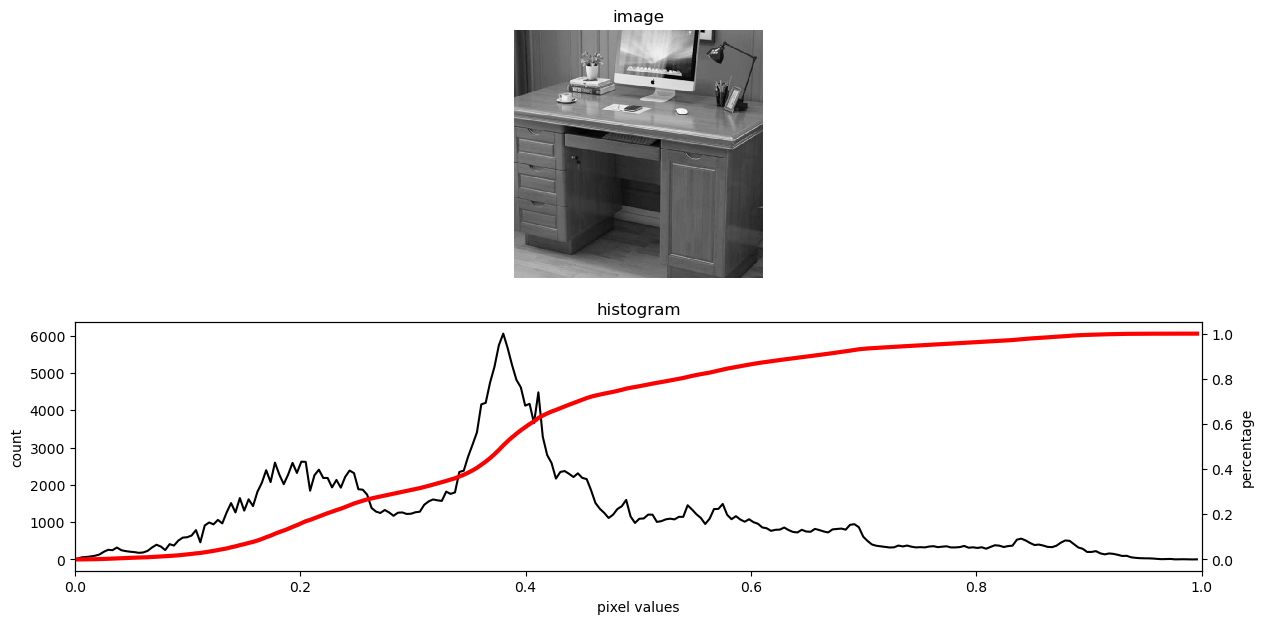

In [59]:
plot_img_and_hist(Ilab[:, :, 0])

In [60]:
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.4, 0.6))

In [61]:
Ilab[:, :, 0] = Idegraded_l*100

In [62]:
Idegraded = color.lab2rgb(Ilab)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\3189329455.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Idegraded)


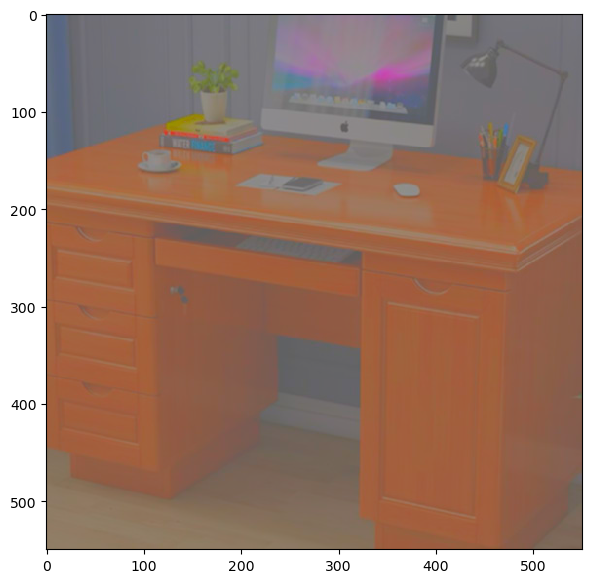

In [63]:
io.imshow(Idegraded)

d:\Anaconda_3.13\Lib\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\2572759415.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq_degraded)


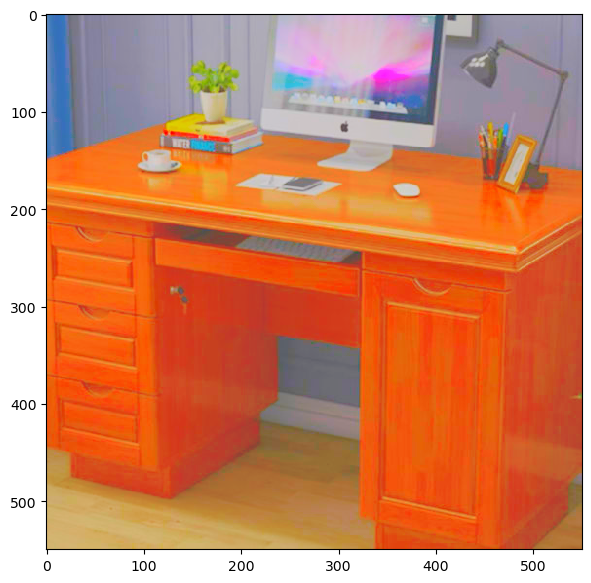

In [64]:
Ieq_degraded = exposure.equalize_hist(Idegraded)
io.imshow(Ieq_degraded)

# Adaptive Histogram Equalization

In [65]:
I = io.imread("Tsukuba.jpeg")
I = I/255

In [66]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(128, 128), clip_limit=0)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


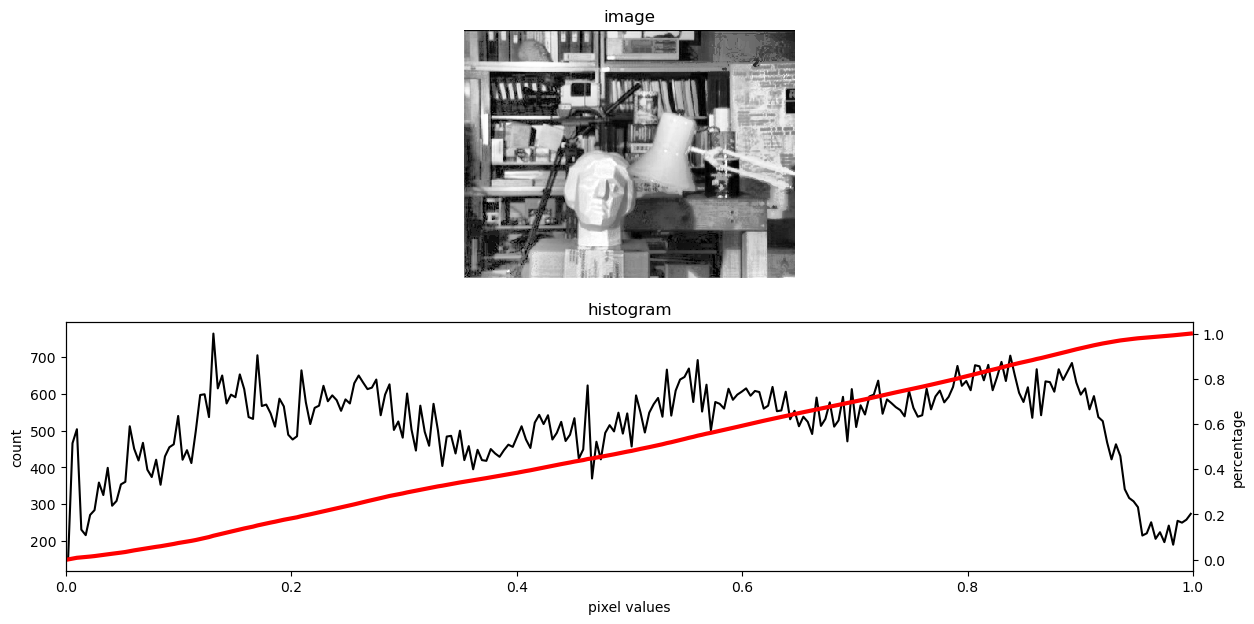

In [67]:
plot_img_and_hist(I_adapt_eq)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\286110763.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_adapt_eq)


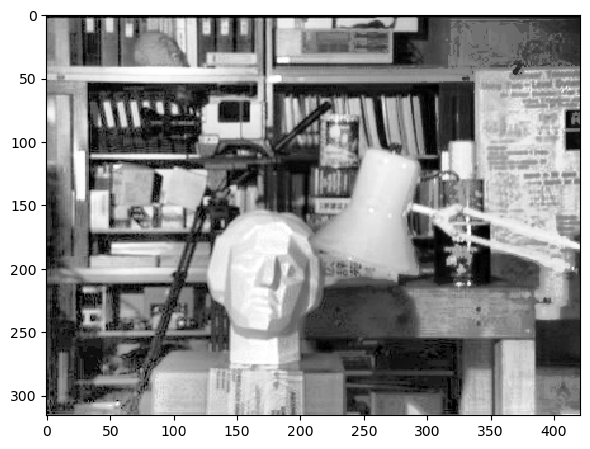

In [68]:
io.imshow(I_adapt_eq)

In [69]:
I = io.imread("moon.jpg")
I = I/255
I = color.rgb2gray(I)
# I=I[:,I.shape[1]//2:]
# I=I[:,:I.shape[1]//2]
print(I.shape)

FileNotFoundError: No such file: 'c:\Users\Takee\Desktop\Git codes\CSE428\CSE428-codes\Lab-3\moon.jpg'

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


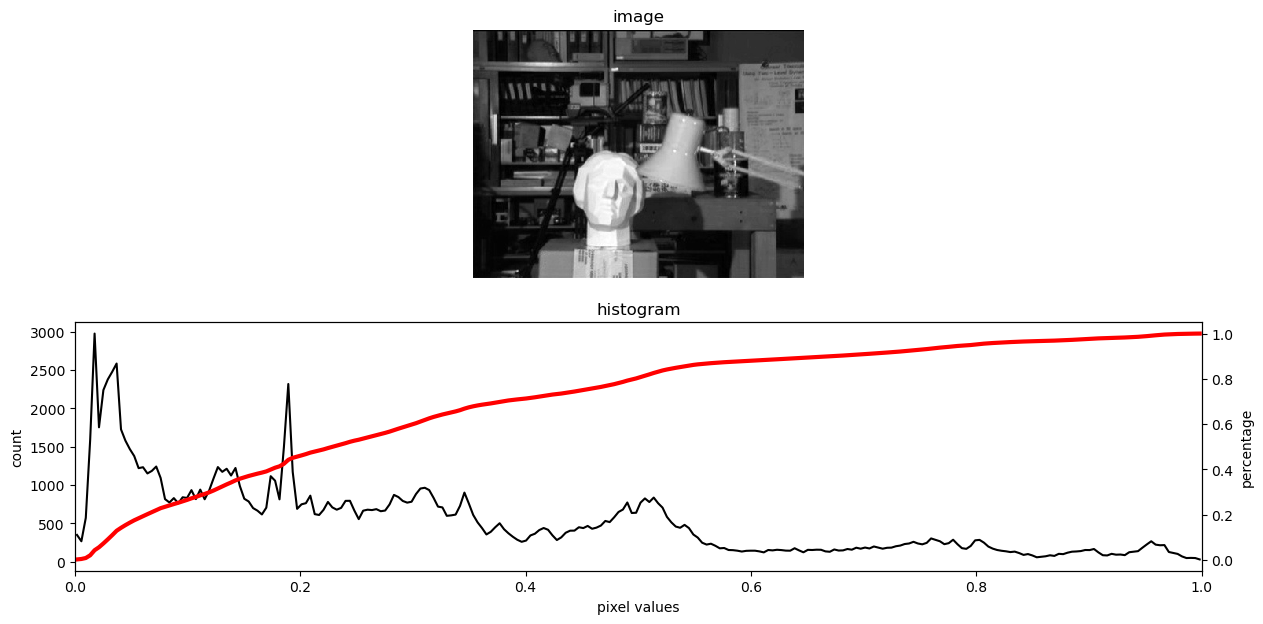

In [70]:
plot_img_and_hist(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


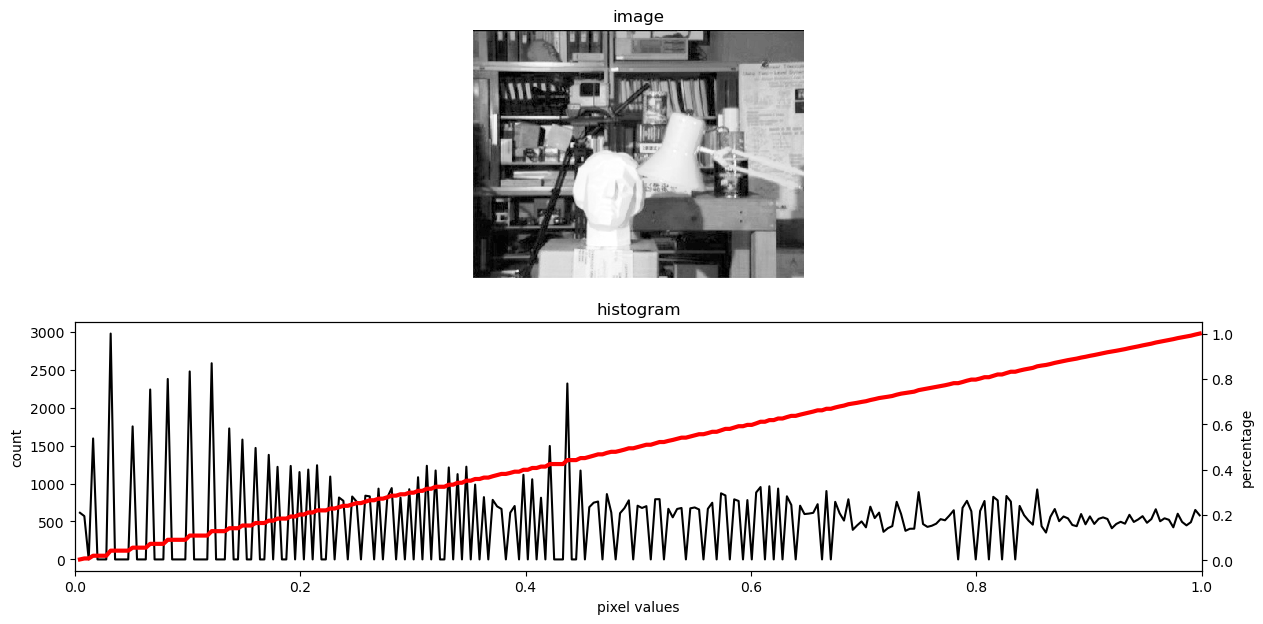

In [71]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


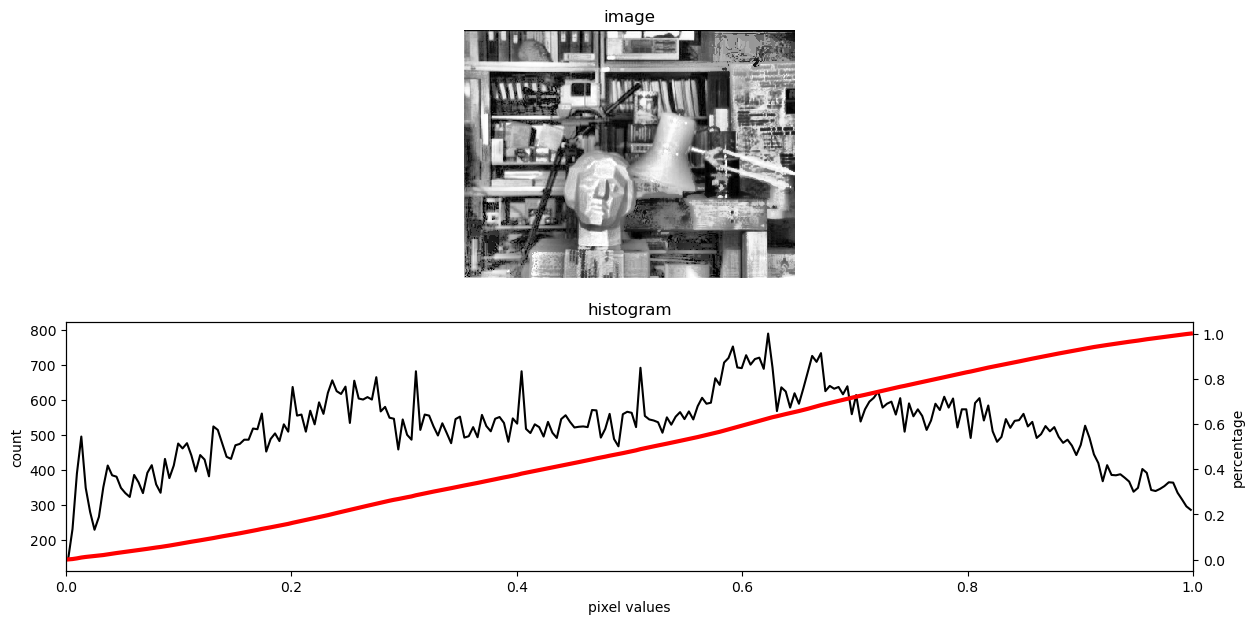

In [72]:
I_AHE = exposure.equalize_adapthist(I, kernel_size=(64, 64), clip_limit=0)
plot_img_and_hist(I_AHE)

# CLAHE

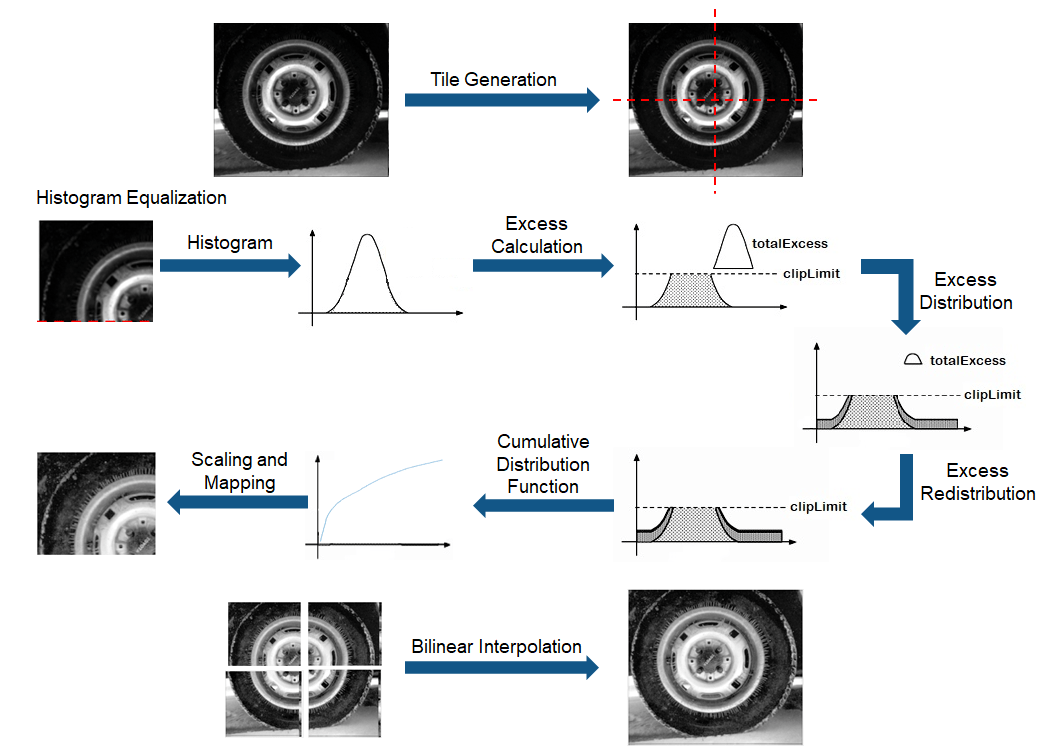

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


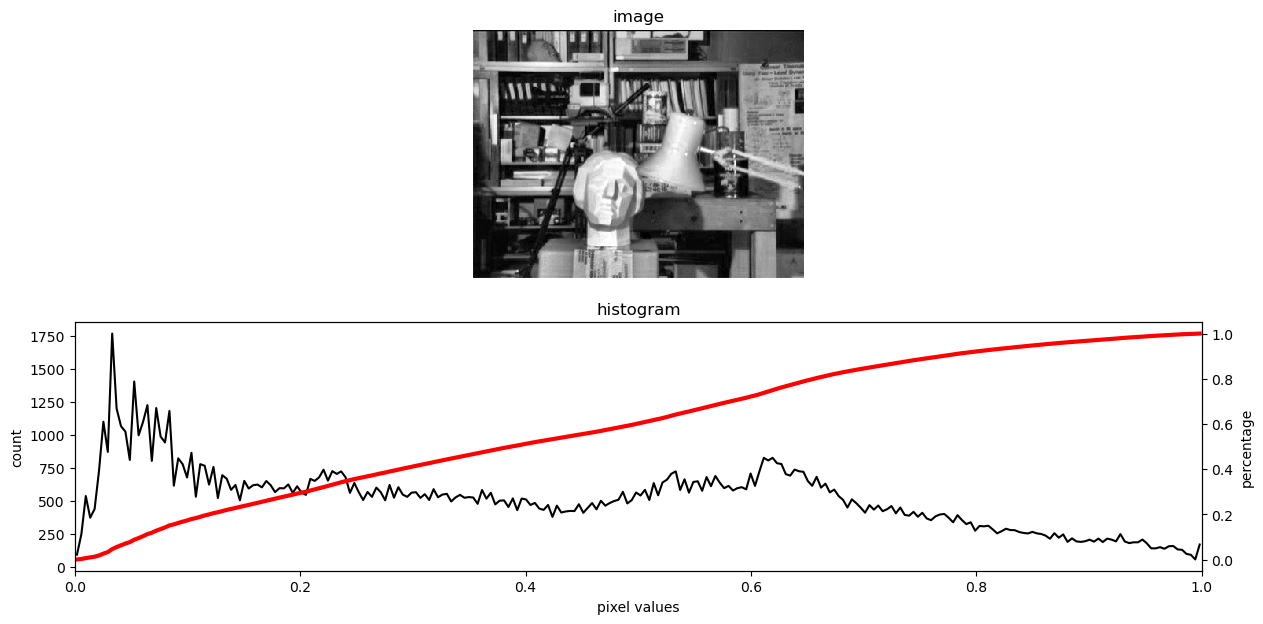

In [73]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(64, 64), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


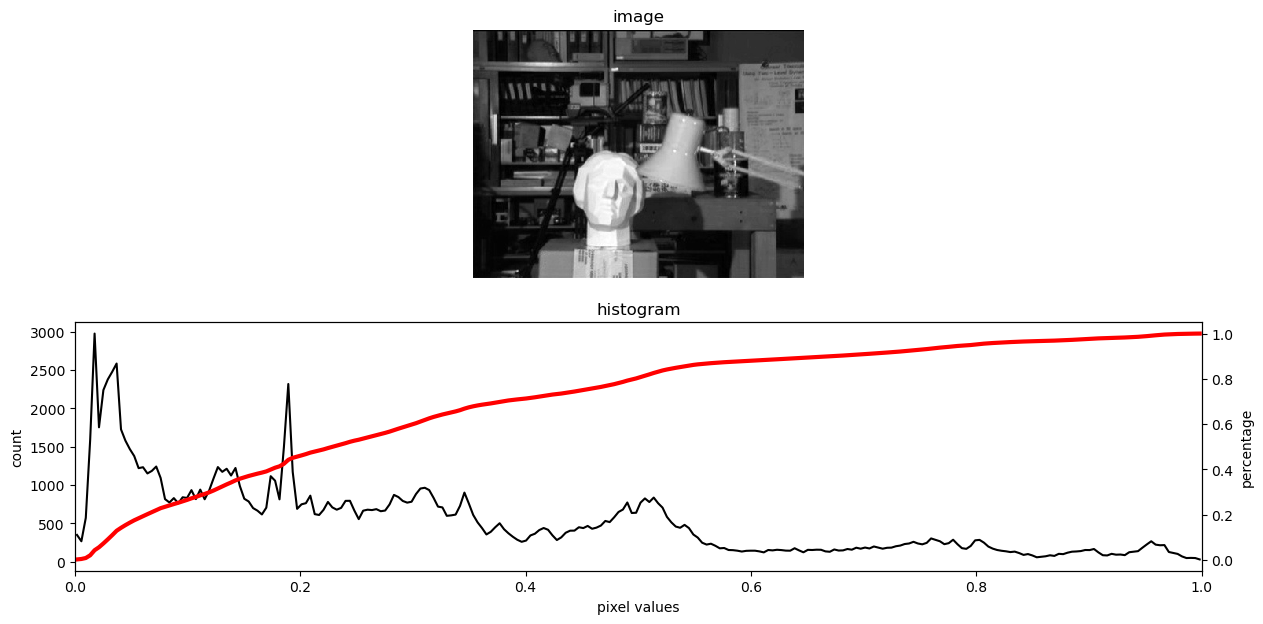

In [74]:
I = io.imread("Tsukuba.jpeg")
I = I/255
plot_img_and_hist(I)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


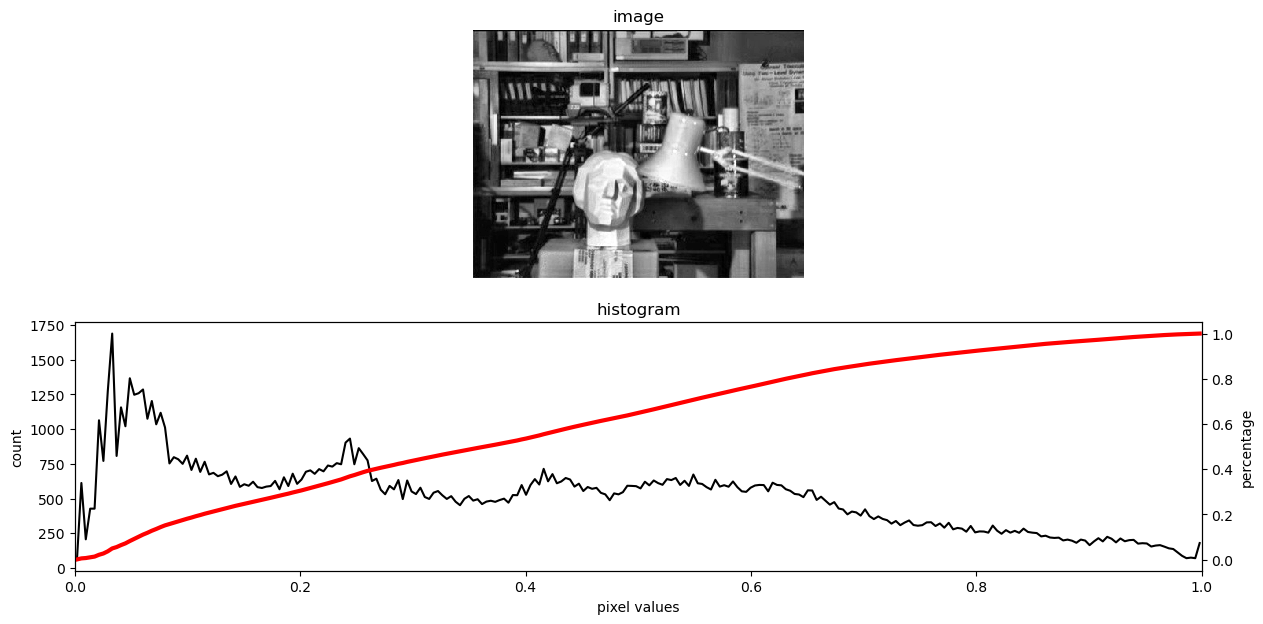

In [75]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)

C:\Users\Takee\AppData\Local\Temp\ipykernel_8484\665705668.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_CLAHE)


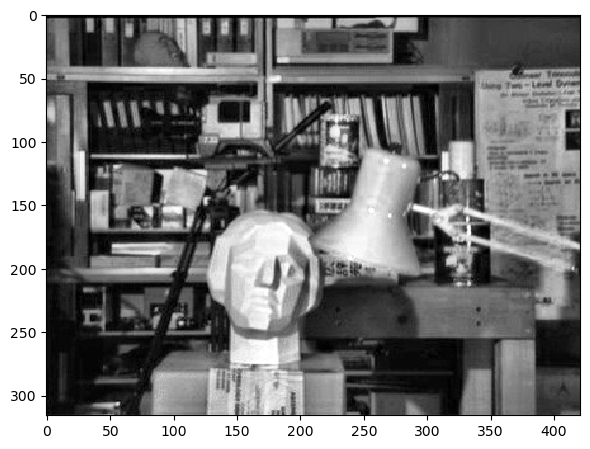

In [76]:
io.imshow(I_CLAHE)